In [2]:
%pip install tensorflow.keras.datasets

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.datasets (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\krish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow.keras.datasets


In [3]:
# print(train_data, train_labels) 
word_index = imdb.get_word_index() #word_index is a dict mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
) #reversing dict so we can get word for number
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
) #decoded the review, indices are offset by 3, reserved for "padding", "start of sequence" and "unknown"

print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [4]:
# Preparing the data

# encoding the integer sequences via multi-hot encoding

# print(train_data)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # print(results)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
        
    return results

x_train = vectorize_sequences(train_data)
# print(x_train)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32") #vectorizing labels(turning them into NumPy arrays), casting them to float32 for compatibility and performance
y_test = np.asarray(test_labels).astype("float32")

print(train_labels)
print(y_train)
print(type( train_labels[0]))

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]
<class 'numpy.int64'>


In [6]:
# Building your model

# input data is vectors and the labels are scalars(1s and 0s), type of model that performs well on such a problem is plain stack of densely connected(Dense) layers with relu activation
# for now choosing layers and units for each layer based on the book

# model definition

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #first argument passed to each Dense layer is the number of units in the layer: the dimensionality of representation space of the layer
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16 units mean the weight matrix W will have shape (input_dimension, 16), dot product with W
# will project the input data onto a 16-dimensional representation space, then add the bias vector b and apply relu operation
# having more units(a higher dim representation space) allows our model to learn more complex represntations, but it makes the model more computatioinally expensive and may lead to learning 
# unwanted patterns(patterns that will improve performance on the training data but on the test data)

# intermediate layers use relu as their activation function and the final layers uses a sigmoid activation
# so as to output probability(a score between 0 and 1 indicating how likely the sample is to have the target 1: how likely review positive)

# a relu(rectified linear unit) is a function meant to zero out negative values
# where a sigmoid "squashes" arbitrary values into the [0,1] interval(something interpreted as probability)

<!-- Activation functions and why are they necessary -->

without it(like relu), the dense layer would consist of two linear operations - a dot product and an addition:
output = dot(input, W) + b

the layer could only learn linear transformations(affine transformations) fo the input data: 
the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dim space. Such a hypothesis space too restricted and won't benefit from multiple layers of representations as a deep stack of linear layers would still implement a linear operation.

in order to get access to a much richer hypothesis space that benefits from deep representations, we need a non-linearity or activation function. relu a popular choice(other similar prelu, elu and so on)

In [7]:
# now we choose a loss function and an optimizer
# it is best to use binary_crossentropy loss as best with models that output probabilities
# Crossentropy is a quantity from the field of information theory that measures the distance between probability
# distributions or in this case between the ground truth distribution and your predictions

# compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [8]:
# Validating approach
# DL model should be evaluated on validation set to monitor the accuracy of the model during training.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# model train and monitor loss and accuracy

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# at the end of every epoch, a slight pause as the model computes its loss and accuracy on the 10000 samples of the validation data
# call to model.fit() returns a History object, it has member history, a dict ocntaining data about every thing that happend during training


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5781 - loss: 0.6440 - val_accuracy: 0.8496 - val_loss: 0.4653
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8886 - loss: 0.3950 - val_accuracy: 0.8849 - val_loss: 0.3350
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9225 - loss: 0.2602 - val_accuracy: 0.8873 - val_loss: 0.2943
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9359 - loss: 0.2034 - val_accuracy: 0.8762 - val_loss: 0.3059
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9484 - loss: 0.1666 - val_accuracy: 0.8834 - val_loss: 0.2917
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9605 - loss: 0.1378 - val_accuracy: 0.8858 - val_loss: 0.2918
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9680 - loss: 0.1174 - val_accuracy: 0.8769 - val_loss: 0.3177
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9762 - loss: 0.0978 - val_accuracy: 0.8819 - v

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

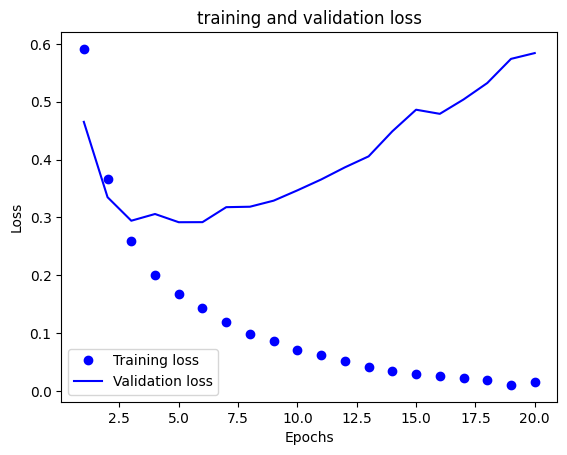

In [11]:
# plotting the training and validation loss and accuracy

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

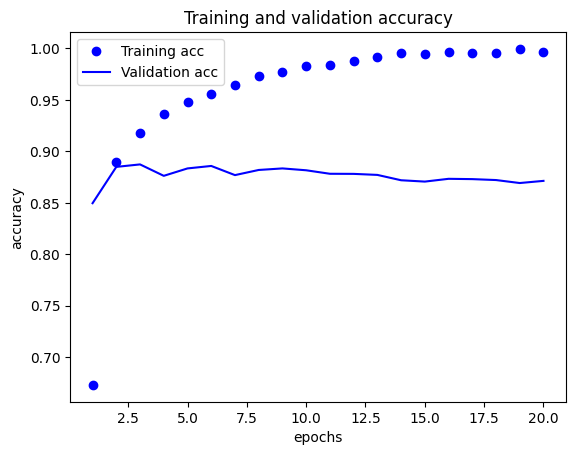

In [12]:
# plotting the train.. and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

<!-- warned thing that  -->
a model that performs better on the training data isn't necessarily a model that will
do better on data it has never seen before, example of overfitting, after the fourth epoch, we are 
overoptimizing on the training data and it gets ended up learning representations that are specific to the training data and don't generalize to data outside of the training set

we can stop training after four epochs in this case to avoid overfitting.

In [13]:
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7312 - loss: 0.5439
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9066 - loss: 0.2785
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9292 - loss: 0.2056
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9409 - loss: 0.1721
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8833 - loss: 0.2867


In [14]:
#  trained model use to generate predictions on new data

model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.23824817],
       [0.9997187 ],
       [0.8044272 ],
       ...,
       [0.1350245 ],
       [0.08574808],
       [0.58420956]], dtype=float32)

In [15]:
# experiments

# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7345 - loss: 0.1816
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8976 - loss: 0.0797
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9229 - loss: 0.0606
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9337 - loss: 0.0529
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8724 - loss: 0.0957


<!-- take away from example -->
 ---need to do quite a bit of preproessing on raw data in order to be able to feed it - as tensors - into a NN.
 Sequences of words can be encoded as binary vectors but there are other encoding options too.

 ---stacks of dense layers with relu activations can solve a wide range of problems

 ---in a binary classification problem(two output classes), model should end with a Dense layer with one unit and a sigmoid activation: the output of model should be a scalar between 0 and 1, encoding a probability

 ---for such a scalar sigmoid output on a binary classification problem, the loss function : binary_crossentropy

 ---the rmsprop optimizer is good enough choice for all our problems

 ---overfitting problem, always monitor performance on data that is outside of training set.

In [16]:
# classifying newswires: A multiclass classification example, single-label multiclass classification and multilabel multiclass classification

# The Reuters dataset, 

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [17]:
print(len(train_data))

print(len(test_data))

train_data[10]

8982
2246


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [18]:
# decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [19]:
# preparing the data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# to vectorize the labels, two possibilities, can cast the label list as an integer tensor or can use one hot encoding
# one hot encoding - categorical encoding

# encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [20]:
print(y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
# built in way in Keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [22]:
print(y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
# building the model
# in this example we have classes of number 46, the dimensionality of the output space is much larger
# in previous example, each layer can only access information present in the output of the previous layer
# if one layer drops some info relevant to the classification problem, this info can never be recovered by latter layers
# each layer can potentially become an information bottleneck

# model defn
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# things to note in this architecture, model end with a Dense layer of size 46, for each input
# sample, the network will output a 46 dim vector, each entry in this vector will encode a different output class
# second, the last layer uses a softmax activation, means the model will output a probability distribution over the 46 different output classes

# best loss function to use in this case is categorical_crossentropy measures the distance between two 
# probability distributions, here between the probability dist output by the model and the true dist of the labels
# by minimizing the distance between these two, we train the model to output something as close as possible to the true fields



In [24]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [25]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [26]:
# model train
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3788 - loss: 3.1557 - val_accuracy: 0.6270 - val_loss: 1.8159
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6545 - loss: 1.6580 - val_accuracy: 0.6820 - val_loss: 1.4188
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7258 - loss: 1.2652 - val_accuracy: 0.7350 - val_loss: 1.2242
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7815 - loss: 1.0169 - val_accuracy: 0.7550 - val_loss: 1.1006
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8133 - loss: 0.8616 - val_accuracy: 0.7770 - val_loss: 1.0366
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8492 - loss: 0.7153 - val_accuracy: 0.7970 - val_loss: 0.9616
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8724 - loss: 0.5881 - val_accuracy: 0.7950 - val_loss: 0.9163
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8943 - loss: 0.5098 - val_accuracy: 0.8100 - v

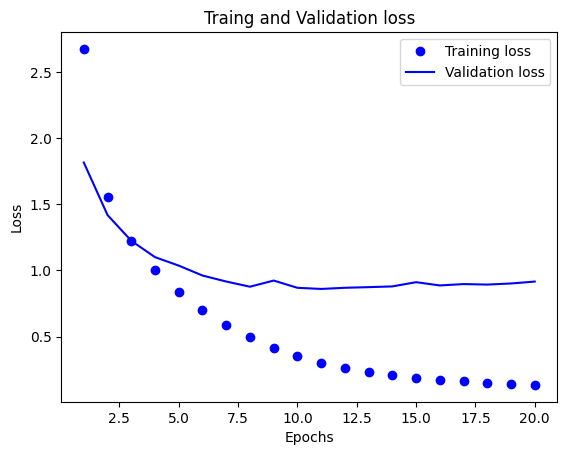

In [27]:
# plotting the train and val loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traing and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

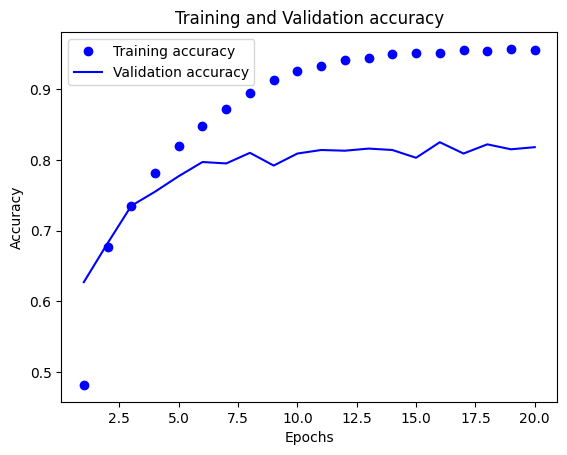

In [28]:
# plotting the training and validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# retraining for 9 epochs as above starts overfitting after 9 epochs
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3753 - loss: 3.2672
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6709 - loss: 1.6348
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7294 - loss: 1.2250
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7844 - loss: 0.9918
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8249 - loss: 0.8196
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8559 - loss: 0.6696
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8855 - loss: 0.5340
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9021 - loss: 0.4408
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9190 - loss: 0.3760
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7983 - loss: 0.9057


[0.9172607660293579, 0.7916295528411865]

In [30]:
# accuracy of a random baseline

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18165627782724844

In [31]:
# generating predictions on new data
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [33]:
predictions[0], np.sum(predictions[0])

(array([2.0766392e-04, 3.8090732e-04, 6.3061809e-05, 7.5387919e-01,
        2.0307544e-01, 2.2999088e-04, 1.4392653e-04, 1.6112474e-04,
        1.9381475e-02, 2.7288175e-05, 1.0074707e-03, 3.0199026e-03,
        2.8413138e-04, 1.1558251e-03, 1.6331565e-04, 6.5332701e-05,
        4.1139526e-03, 9.9652978e-05, 9.7283092e-04, 1.5181230e-03,
        1.8927294e-03, 5.3535256e-04, 1.4473754e-04, 1.0071518e-03,
        2.3359520e-05, 8.6571170e-05, 3.1636675e-05, 7.3611358e-05,
        3.4939626e-04, 9.9531852e-04, 3.5637416e-04, 6.0613710e-04,
        3.0491821e-05, 1.1684679e-05, 2.9580609e-04, 1.9839717e-05,
        1.2218427e-03, 3.2859683e-05, 1.4475328e-04, 1.1393526e-03,
        1.3303883e-04, 4.2814718e-04, 1.0328409e-04, 3.6650931e-04,
        5.4484408e-06, 1.3938739e-05], dtype=float32),
 1.0)

In [34]:
np.argmax(predictions[0])

3

In [37]:
# different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels)

y_train, y_test, y_train.shape, y_test.shape

(array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64),
 array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64),
 (8982,),
 (2246,))

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [39]:
# the importance of having sufficiently large intermediate layers
# if in classification problems we have a significant number of categories then we should be
# smart enough to use layers with units more than number of categories otherwise we'll end up
# with information bottleneck

# a model with an information bottleneck

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy"
              ,metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1996 - loss: 3.1005 - val_accuracy: 0.5050 - val_loss: 2.1432
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5325 - loss: 2.0150 - val_accuracy: 0.5670 - val_loss: 1.7070
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5762 - loss: 1.5995 - val_accuracy: 0.5790 - val_loss: 1.5324
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5979 - loss: 1.3822 - val_accuracy: 0.6230 - val_loss: 1.4630
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6507 - loss: 1.2604 - val_accuracy: 0.6460 - val_loss: 1.4236
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6954 - loss: 1.1712 - val_accuracy: 0.6740 - val_loss: 1.3897
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7134 - loss: 1.1064 - val_accuracy: 0.6830 - val_loss: 1.3878
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7328 - loss: 1.0133 - val_accuracy: 0.6790 - v

So there is a drop in accuracy(validation) which indicates that we are trying to compress a lot of information(enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional, model is able to cram of most the necessary info into that 4d representations, but not all of it.

In [46]:
# experiments


model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy"
              ,metrics=["accuracy"])
onelayer_history = model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5268 - loss: 2.3951 - val_accuracy: 0.7150 - val_loss: 1.2476
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7627 - loss: 1.0500 - val_accuracy: 0.7680 - val_loss: 1.0354
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8451 - loss: 0.7088 - val_accuracy: 0.7990 - val_loss: 0.9098
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8958 - loss: 0.5007 - val_accuracy: 0.7980 - val_loss: 0.9107
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9275 - loss: 0.3543 - val_accuracy: 0.8140 - val_loss: 0.8663
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9415 - loss: 0.2658 - val_accuracy: 0.8210 - val_loss: 0.8712
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9507 - loss: 0.2122 - val_accuracy: 0.8110 - val_loss: 0.9336
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9590 - loss: 0.1801 - val_accuracy: 0.8100 - v

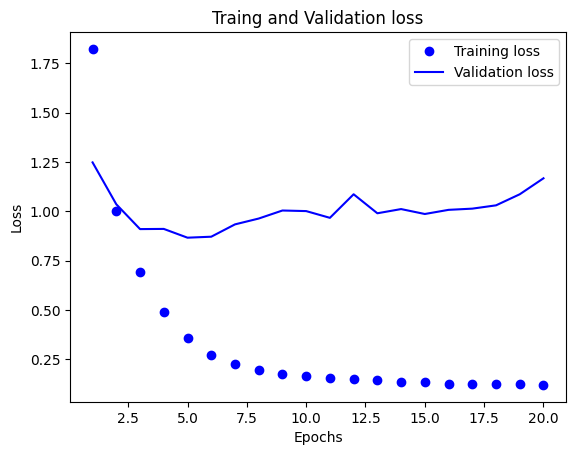

In [47]:
import matplotlib.pyplot as plt

loss = onelayer_history.history["loss"]
val_loss = onelayer_history.history["val_loss"]
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traing and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<!-- take aways -->

- to clasify data points among N classes, the model should end with a Dense layer of size N
- in a single-label, multiclass classification problem, model should end with a softmax activation so that it will output a probability distribution over the N output classes.

-Categorical crossentropy is almost always a best choice for such problems, minimizes the distance between the probability distributions output by the model and the true distribution of the targets.

-two ways to handle labels in multiclass classification:

-encoding the labels via categorical encoding(also known as onehot encoding) and using categorical crossentropy as a loss function

-encoding theh labels as integers and using the sparse categorical crossentropy loss function

-avoid information bottlenecks

Predicting house prices: A regression example

In [48]:
# another common type of ML problem is regression, which consists of predicting a continuous value instead of a discrete label

# logistic regression isn't a regression algorithm, it's a classificaiton algorithm.

The Boston Housing price dataset

In [50]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step


In [62]:
# Preparing the data
# model may learn to automatiacally adapt to heterogenous data(in our case different ranges), but it make learning more difficult
# best practice is to do feature-wise normalization
# for each feature in the input data(a column in the input data matrix), subtract the mean of the feature and divide by the standard deviation,
#  so that the feature is centered around 0 and has a unit standard deviation.

# normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [63]:
# building model

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

# model ends with a single unit and no activation(a linear layer), a typical setup for scalar regression.
# applying an activation function constrain the range the output can take
# compiling the model with the mse loss function - mean squared error, 
# also monitoring a new metric during training: mean absolute error (MAE), it  is the absolute value of the difference betweeen the predicitons
# and the targets.

In [ ]:
# Validating approach using K-fold validation